In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

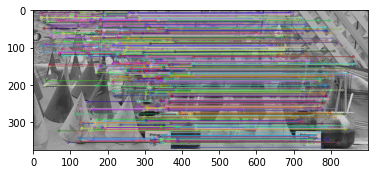

In [265]:
sift = cv.SIFT_create()
img1 = cv.imread('cones-png-2/cones/im2.png',0)
img2 = cv.imread('cones-png-2/cones/im6.png',0)

#img1 = cv.imread('cycle1.png',0)
#img2 = cv.imread('cycle2.png',0)
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()


In [266]:
good[0][0].queryIdx

82

In [267]:
kp1[good[0][0].queryIdx].pt

(20.41543197631836, 11.337044715881348)

In [268]:
arr1 = np.array([kp1[good[i][0].queryIdx].pt for i in range(len(good))])
arr2 = np.array([kp2[good[i][0].trainIdx].pt for i in range(len(good))])

In [269]:
F, _ = cv.findFundamentalMat(arr1,arr2,cv.FM_RANSAC)

In [270]:
F

array([[ 1.76044860e-05, -2.52278709e-04, -2.31713503e-01],
       [ 3.19111175e-04, -2.64723762e-06, -1.12671422e+00],
       [ 2.06533393e-01,  1.08414637e+00,  1.00000000e+00]])

In [ ]:
for i in range(len(good)):
    pt1 = list(kp1[good[i][0].queryIdx].pt)
    pt2 = list(kp2[good[i][0].trainIdx].pt)
    pt1.append(1)
    pt2.append(1)
    pt1 = np.array(pt1)
    pt2 = np.array(pt2)
    pt1 = pt1.reshape(3,1)
    pt2 = pt2.reshape(3,1)


In [272]:
_, H1, H2 = cv.stereoRectifyUncalibrated(arr1,arr2,F,(img1.shape[1],img1.shape[0]))

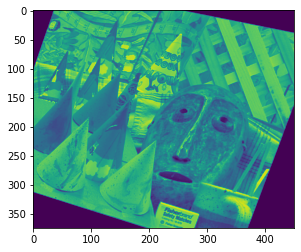

In [273]:
#apply homography
img1_rect = cv.warpPerspective(img1,H1,(img1.shape[1],img1.shape[0]))
img2_rect = cv.warpPerspective(img2,H2,(img2.shape[1],img2.shape[0]))
plt.imshow(img1_rect)

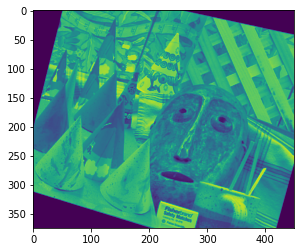

In [274]:
plt.imshow(img2_rect)

In [275]:
img2_rect.shape

(375, 450)

In [276]:
#img2_rect = img2_rect[:img1_rect.shape[0], :img1_rect.shape[1]]

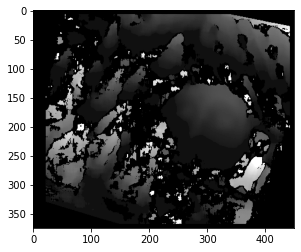

In [277]:
#disparity map
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(img1_rect,img2_rect)
plt.imshow(disparity,'gray')

[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]
[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


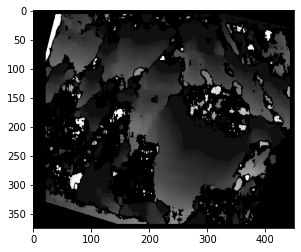

In [286]:
disparity = stereo.compute(img2_rect,img1_rect)
print(disparity)
plt.imshow(disparity,'gray')
for i in range(len(disparity)):
    for j in range(len(disparity[0])):
        if disparity[i][j] != -16:
            disparity[i][j] = -disparity[i][j] + 240
print(disparity)


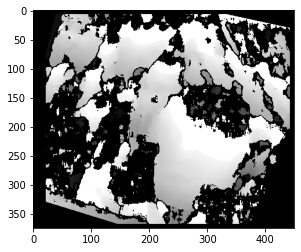

In [287]:
plt.imshow(disparity,'gray')


In [288]:
gt1 = cv.imread('cones-png-2/cones/disp2.png',0)
gt1 = cv.warpPerspective(gt1,H1,(gt1.shape[1],gt1.shape[0]))
#gt1= cv.imread('C://users/rupin/Downloads/disp1-n.pgm', 0)


#gt1 = gt1[:img2_rect.shape[0], :img2_rect.shape[1]]

gt2 = cv.imread('cones-png-2/cones/disp6.png',0)
gt2 = cv.warpPerspective(gt2,H2,(gt2.shape[1],gt2.shape[0]))

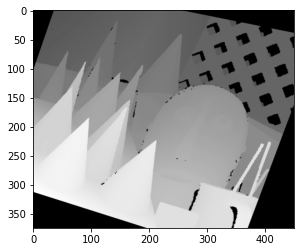

In [289]:
plt.imshow(gt1,'gray')

In [247]:
# numpy normalize mean 0 sd 1
#disparity = (disparity - np.mean(disparity))/np.std(disparity)
#gt1 = (gt1 - np.mean(gt1))/np.std(gt1)

In [283]:
gt1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
s1 = 0
c = 0
for i in range(np.shape(gt1)[0]):
    for j in range(np.shape(gt1)[1]):
        s1 += ((gt1[i,j] - disparity[i,j])**2)/(np.shape(gt1)[0]*np.shape(gt1)[1])
        if c%2000 == 0:
            print(gt1[i,j] - disparity[i,j])
        c += 1
    #print(s1)
#s1 = s1/(np.shape(gt1)[0]*np.shape(gt1)[1])
s1 = np.sqrt(s1)
print(s1)